In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image

# Final project-Bank Data
### Group-5
#### Names: Shalev Sinai , Noam Orenstein , Ben Simhi , Raz Ben Ami
link to origin file: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

<img src='https://raw.githubusercontent.com/raza783/data-analysis-project-bank/main/download.jpg' width='500'/>

In [2]:
url = 'https://raw.githubusercontent.com/raza783/data-analysis-project-bank/main/Churn_Modelling.csv'
bank_df = pd.read_csv(url)
bank_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### We remove the Unnecessary columms

In [3]:
bank_df=bank_df.drop(['RowNumber','CustomerId','Surname'], axis=1)
bank_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### We had changed the columms to comftable names for user

In [4]:
bank_df=bank_df.rename(columns={'Tenure':'YearsAtBank'})
bank_df=bank_df.rename(columns={'Balance':'AvgBalance'})

### Check missing data

In [5]:
bank_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
YearsAtBank        0
AvgBalance         0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Understanding the data

In [6]:
bank_df.describe()

,CreditScore,Age,YearsAtBank,AvgBalance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### We want to create heat map about numeric columss to see the corolations

In [7]:
features = ['CreditScore', 'Age','YearsAtBank','AvgBalance','NumOfProducts','EstimatedSalary']
new_bank_df=bank_df[features].corr(method='spearman')

<AxesSubplot:>

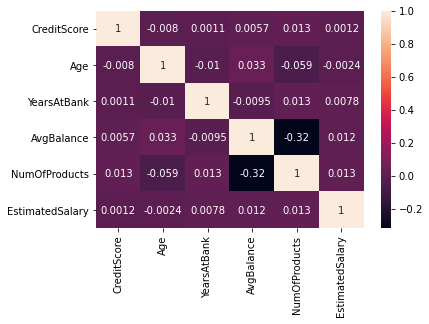

In [8]:
sns.heatmap(data=new_bank_df,annot=True)

#### We can see that there is negative corolation between 'AvgBalance' and 'NumOfProducts' (-0.32). now we will explore it deeper

<AxesSubplot:xlabel='NumOfProducts', ylabel='AvgBalance'>

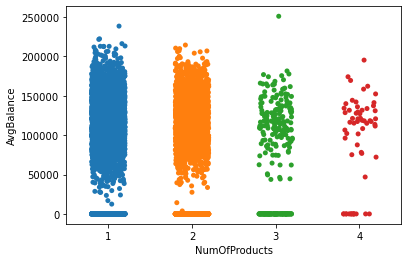

In [9]:
sns.stripplot(data = bank_df, x = 'NumOfProducts', y = 'AvgBalance',jitter=0.2)

### Conclusion 1:

we can see that as long there is more products,the avg balance are smaller and we can anderstand that poeple with more products in the bank probably have less money is balance

___________________________________________________________________________

### We create a new data frame groupted by Geography (mean function)

In [10]:
grouped_bank_df = bank_df.groupby('Geography').mean()
grouped_bank_df

,CreditScore,Age,YearsAtBank,AvgBalance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


### We can see that the AvgBalance in Germany are very high,lets see it in graphs...

<AxesSubplot:xlabel='AvgBalance', ylabel='Count'>

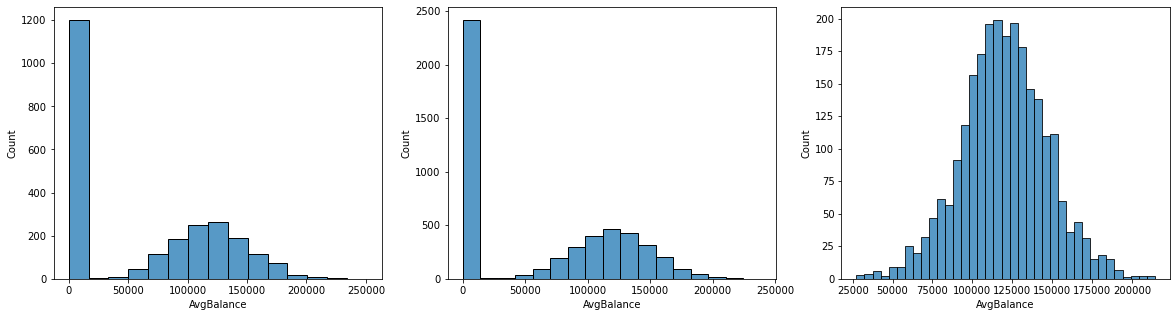

In [11]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.histplot(data=bank_df[bank_df.Geography == 'Spain'], x='AvgBalance',ax=axes[0])
sns.histplot(data=bank_df[bank_df.Geography == 'France'], x='AvgBalance',ax=axes[1])
sns.histplot(data=bank_df[bank_df.Geography == 'Germany'], x='AvgBalance',ax=axes[2])

##### We can see that in Germany there is no zero values like the others countries,there is several reasons to that:

1.There is a minimum cash value to use account in Germany

2.Germany gives information only above 0

3.The data is reflecting the reality

##### We choose to work with the data like it is the reality(option 3)

#### Lets check other features- years at bank and num of products to make our conclusion stronger 

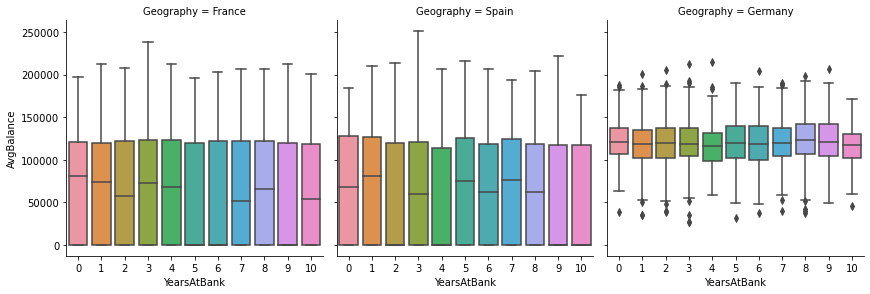

In [12]:
sns.catplot(data=bank_df, x='YearsAtBank', y='AvgBalance',col='Geography', kind='box', col_wrap=3, height=4)

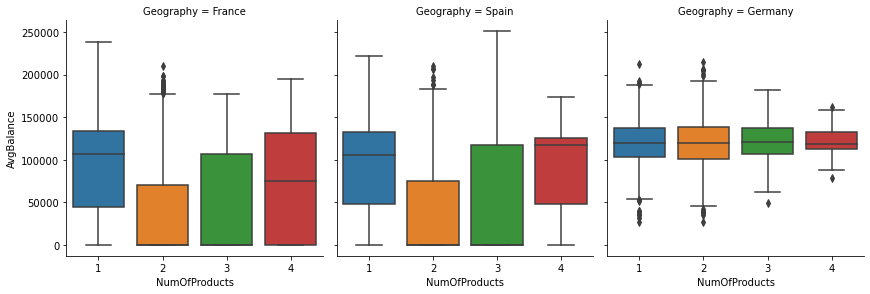

In [13]:
sns.catplot(data=bank_df, x='NumOfProducts', y='AvgBalance',col='Geography', kind='box', col_wrap=3, height=4)

### Conclusion 2:
1.The balance accounts in Germany are more stable and without many outliers and we can trust is to give more "credit" and more flexability in the accounts.

2.There is almost half "zeros" balance accounts in France and Spain and we need to understand the reasons and help them to recover.

________________________________________________________________________________________________________________

### Now we continue to predict exit of costumers at bank by making a decision tree  classifier 

<img src='https://raw.githubusercontent.com/raza783/data-analysis-project-bank/main/predict%20photo.jpg' width='500'/>

In [14]:
bank_features = ['CreditScore', 'Age', 'YearsAtBank', 'AvgBalance', 'HasCrCard','IsActiveMember','NumOfProducts','EstimatedSalary'] 
X = bank_df[bank_features]
y = bank_df['Exited']

In [15]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [16]:
bank_model = sk.tree.DecisionTreeClassifier(random_state=1)
bank_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
def eval(x,y,bank_model):
    pred = bank_model.predict(x)
    y_alt=y.values
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
    print("in the true data {:.3f}% where exited.".format(100*(y.values>0).sum()/len(y.values)) )

In [18]:
eval(X_test,y_test,bank_model)

Acc: 0.784
in the true data 20.900% where exited.


we see that the accuracy is not enough for good model, we need accuracy above 0.79, we will make a forest classifier to improve our model accuracy

In [19]:
rf = RandomForestClassifier(max_depth=9, random_state=0)
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
acc

0.856

this accuracy is high than the baseline and now we can use it.

### Conclusion 3: prediction

we create a prediction by classifier tree regressor , and improve by forest. the accuracy of the model is high enough and now we can predict the next costumer loyalty at the bank
and understand the reasons of exited costumers and how we can make them stay.

<img src='https://raw.githubusercontent.com/raza783/data-analysis-project-bank/main/thank-you-for-your-response-ft.jpg' width='500'/>